In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
!pip install spacy

In [13]:
import spacy
import en_core_web_lg

In [14]:
NLP = en_core_web_lg.load()

In [15]:
x = "king man woman"
doc = NLP(x)
for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

king king 1.0
king man 0.4088461101055145
king woman 0.2655659317970276
man king 0.4088461101055145
man man 1.0
man woman 0.7401744723320007
woman king 0.2655659317970276
woman man 0.7401744723320007
woman woman 1.0


### Building Our Model

In [16]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
import json
reviews = []
sentiments = []
file_name = "drive/MyDrive/Books_5_9999_evenly.json"
with open(file_name) as f:
  for line in f:
    review = json.loads(line)
    reviews.append(review["reviewText"])
    sentiments.append(review["overall"])

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git
import preprocess_kgptalkie as ps
import re

In [19]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [20]:
d = {"reviews": reviews, "points": sentiments}
df = pd.DataFrame(d)
df

,reviews,points
0,This book was supposed to be a best seller so ...,3.0
1,"In the closing months of World War II, twenty-...",3.0
2,I think Stien is one of finest erotica writers...,3.0
3,The bridge novel in J. R. R. Tolkien's famous ...,3.0
4,"This book has many twists and turns, it kept m...",5.0
...,...,...
9994,I thought I would be the curmudgeon saying tha...,2.0
9995,"Like any &#34;historical&#34; fiction novel, o...",5.0
9996,I enjoyed reading this volume and appreciate t...,4.0
9997,This book should be required reading for paren...,1.0


In [21]:
df["reviews"] = df["reviews"].apply(lambda x: get_clean(x))

In [22]:
df

,reviews,points
0,this book was supposed to be a best seller so ...,3.0
1,in the closing months of world war ii twentyfo...,3.0
2,i think stien is one of finest erotica writers...,3.0
3,the bridge novel in j r r tolkiens famous fant...,3.0
4,this book has many twists and turns it kept me...,5.0
...,...,...
9994,i thought i would be the curmudgeon saying tha...,2.0
9995,like any historical fiction novel one must be ...,5.0
9996,i enjoyed reading this volume and appreciate t...,4.0
9997,this book should be required reading for paren...,1.0


### Conversion

In [23]:
x = "cat dog"
doc = NLP(x)


In [78]:
doc

cat dog

In [ ]:
doc.vector

In [25]:
doc.vector.shape

(300,)

In [26]:
def get_vec(x):
  doc = NLP(x)
  vec = doc.vector
  return vec

In [27]:
get_vec(x)

array([-2.76215017e-01,  1.73051000e-01, -1.06199495e-01, -2.87514985e-01,
       -6.71409965e-02,  3.10755014e-01, -1.97300002e-01, -2.83794999e-01,
        9.76060033e-02,  1.66744995e+00, -6.34269953e-01,  9.63025019e-02,
       -6.48334980e-01,  1.21810503e-01, -2.99584985e-01,  2.50550002e-01,
        2.70019501e-01,  1.12965000e+00, -1.50799975e-02, -3.55899990e-01,
       -3.66439998e-01, -6.04224950e-02,  5.51749915e-02, -3.11755002e-01,
        3.66990000e-01, -1.74511507e-01, -3.25464994e-01, -4.03584987e-01,
        2.28844002e-01, -1.20778494e-01, -6.23224974e-01,  6.32480010e-02,
       -1.10113002e-01,  4.38295007e-01,  3.05490017e-01,  6.75000250e-03,
        5.48135042e-01, -8.55714977e-01, -1.13398999e-01,  1.28289998e-01,
        2.71515012e-01,  1.46710008e-01, -1.70319498e-01, -3.54690015e-01,
        2.79549956e-02, -1.16696998e-01, -4.24840003e-01,  2.22696498e-01,
       -4.93499637e-03, -2.17053995e-01,  1.82810009e-01,  9.06850100e-02,
        1.11986503e-01,  

In [28]:
df["vec"] = df["reviews"].apply(lambda x: get_vec(x))

In [29]:
df.head()

,reviews,points,vec
0,this book was supposed to be a best seller so ...,3.0,"[-0.014849584, 0.21104869, -0.15673302, -0.074..."
1,in the closing months of world war ii twentyfo...,3.0,"[0.06272754, 0.0677921, -0.0718665, -0.0253473..."
2,i think stien is one of finest erotica writers...,3.0,"[-0.011837674, 0.13551477, -0.14289556, -0.007..."
3,the bridge novel in j r r tolkiens famous fant...,3.0,"[0.0038804708, 0.07443543, -0.13911256, -0.052..."
4,this book has many twists and turns it kept me...,5.0,"[0.061509643, 0.16203243, -0.14604068, 0.00774..."


### Training Our Model

In [30]:
flat = df["vec"].to_numpy()
flat = flat.reshape(-1,1)

In [31]:
flat.shape

(9999, 1)

In [32]:
flat = np.concatenate(np.concatenate(flat, axis = 0),axis = 0).reshape(-1,300)

In [33]:
flat.shape

(9999, 300)

In [34]:
def get_sentiment(score):
  if score <= 2:
    return "negative"
  elif score == 3:
    return "neutral"
  else:
    return "positive"

In [35]:
df["sentiments"] = df["points"].apply(lambda x: get_sentiment(x))

In [36]:
df.head()

,reviews,points,vec,sentiments
0,this book was supposed to be a best seller so ...,3.0,"[-0.014849584, 0.21104869, -0.15673302, -0.074...",neutral
1,in the closing months of world war ii twentyfo...,3.0,"[0.06272754, 0.0677921, -0.0718665, -0.0253473...",neutral
2,i think stien is one of finest erotica writers...,3.0,"[-0.011837674, 0.13551477, -0.14289556, -0.007...",neutral
3,the bridge novel in j r r tolkiens famous fant...,3.0,"[0.0038804708, 0.07443543, -0.13911256, -0.052...",neutral
4,this book has many twists and turns it kept me...,5.0,"[0.061509643, 0.16203243, -0.14604068, 0.00774...",positive


### ML

In [86]:
y = df["sentiments"]

In [87]:
y

0        neutral
1        neutral
2        neutral
3        neutral
4       positive
          ...   
9994    negative
9995    positive
9996    positive
9997    negative
9998    positive
Name: sentiments, Length: 9999, dtype: object

In [117]:
x_train, x_test, y_train, y_test = train_test_split(flat, y, test_size = 0.30, random_state = 31, stratify = y)

In [118]:
x_train.shape

(6999, 300)

In [119]:
x_test.shape

(3000, 300)

### Train ML Model

In [120]:
clf = LogisticRegression(solver = "liblinear")


In [121]:
clf.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [122]:
y_pred = clf.predict(x_test)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.66      0.73      0.69      1000
     neutral       0.60      0.47      0.53      1000
    positive       0.74      0.80      0.77      1000

    accuracy                           0.67      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.66      0.67      0.66      3000



In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [125]:
clfSVC = make_pipeline(StandardScaler(), SVC(gamma = "auto"))
clfSVC.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [126]:
y_predSVC = clfSVC.predict(x_test)

In [127]:
print(classification_report(y_test, y_predSVC))

              precision    recall  f1-score   support

    negative       0.69      0.70      0.70      1000
     neutral       0.60      0.55      0.57      1000
    positive       0.76      0.81      0.79      1000

    accuracy                           0.69      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.68      0.69      0.69      3000



In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
print("CrossValScoreLOGREG:", cross_val_score(clf, x_test, y_test, cv=10))

CrossValScoreLOGREG: [0.65       0.66666667 0.65       0.63       0.65       0.65333333
 0.66333333 0.65333333 0.66666667 0.62666667]


In [130]:
print("CrossValScoreSVC:", cross_val_score(clfSVC, x_test, y_test, cv = 10))

CrossValScoreSVC: [0.67       0.69333333 0.67333333 0.63333333 0.65333333 0.63333333
 0.66666667 0.64666667 0.68333333 0.63666667]


In [131]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pred_clf = clf.predict(x_test)

In [132]:
cm = confusion_matrix(y_test, pred_clf)
print(cm)

[[735 194  71]
 [315 475 210]
 [ 68 128 804]]


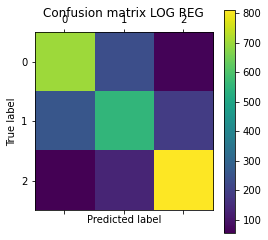

In [155]:
plt.matshow(cm)
plt.title('Confusion matrix LOG REG')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [134]:
pred_clf_SVC = clfSVC.predict(x_test)

In [135]:
cm = confusion_matrix(y_test, pred_clf_SVC)
print(cm)

[[700 238  62]
 [257 552 191]
 [ 55 133 812]]


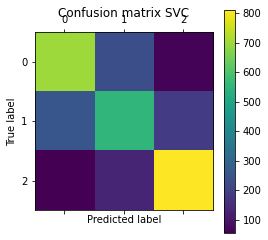

In [136]:
plt.matshow(cm)
plt.title('Confusion matrix SVC')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [45]:
import pickle

In [138]:
pickle.dump(clf, open("w2v_sentiment_LogReg.pkl", "wb"))

In [140]:
pickle.dump(clfSVC, open("w2v_sentiment_SVC.pkl", "wb"))

In [148]:
model = pickle.load(open("w2v_sentiment_LogReg.pkl", "rb"))

In [149]:
deneme1 = "I want more!"
deneme1 = get_clean(deneme1)
vecx = get_vec(deneme1)

In [150]:
model.predict(vecx.reshape(1,-1))

array(['positive'], dtype=object)

In [151]:
deneme2 = "It's confusing, but ok."
deneme2 = get_clean(deneme2)
vecz = get_vec(deneme2)

In [152]:
model.predict(vecz.reshape(1,-1))

array(['neutral'], dtype=object)

In [153]:
deneme3 = "This book left me hornswoggled"
deneme3 = get_clean(deneme3)
vecy = get_vec(deneme3)

In [154]:
model.predict(vecy.reshape(1,-1))

array(['negative'], dtype=object)